In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.insert(1, os.path.join(sys.path[0], ".."))
sys.path.append('../../')
from reproduction.pipeline import load as pipeline
from reproduction.analysis import AEData

# Load Model 

In [2]:
model_dir = "/home/rlourenco/rdcep_clouds/output/m9-22_oceans/"

In [3]:
redefine_json = False
if redefine_json:
    import reproduction.models

    ae = reproduction.models.autoencoder(
        shape=(128, 128, 7),
        n_blocks=4,
        base=8,
        batchnorm=True,
        variational=False,
        block_len=0,
        nonlinearity=lambda: tf.keras.layers.Activation("relu")
    )
    with open(model_dir + "ae.json", "w") as f:
        f.write(ae.to_json())


In [4]:
def load_model(mname, summary=True):
    with open(mname + ".json", "r") as f:
        m = tf.keras.models.model_from_json(f.read())
    m.load_weights(mname + ".h5")
    m.summary()
    return m    

In [5]:
encoder = load_model(model_dir + "encoder")

/home/rlourenco/miniconda3/envs/clouds-analysis-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 128, 128, 7)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 1024        encoder_input[0][0]              
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 16)   2320        leaky_re_lu[0][0]                
__________________________________________________________________________________________________
leaky_re_l

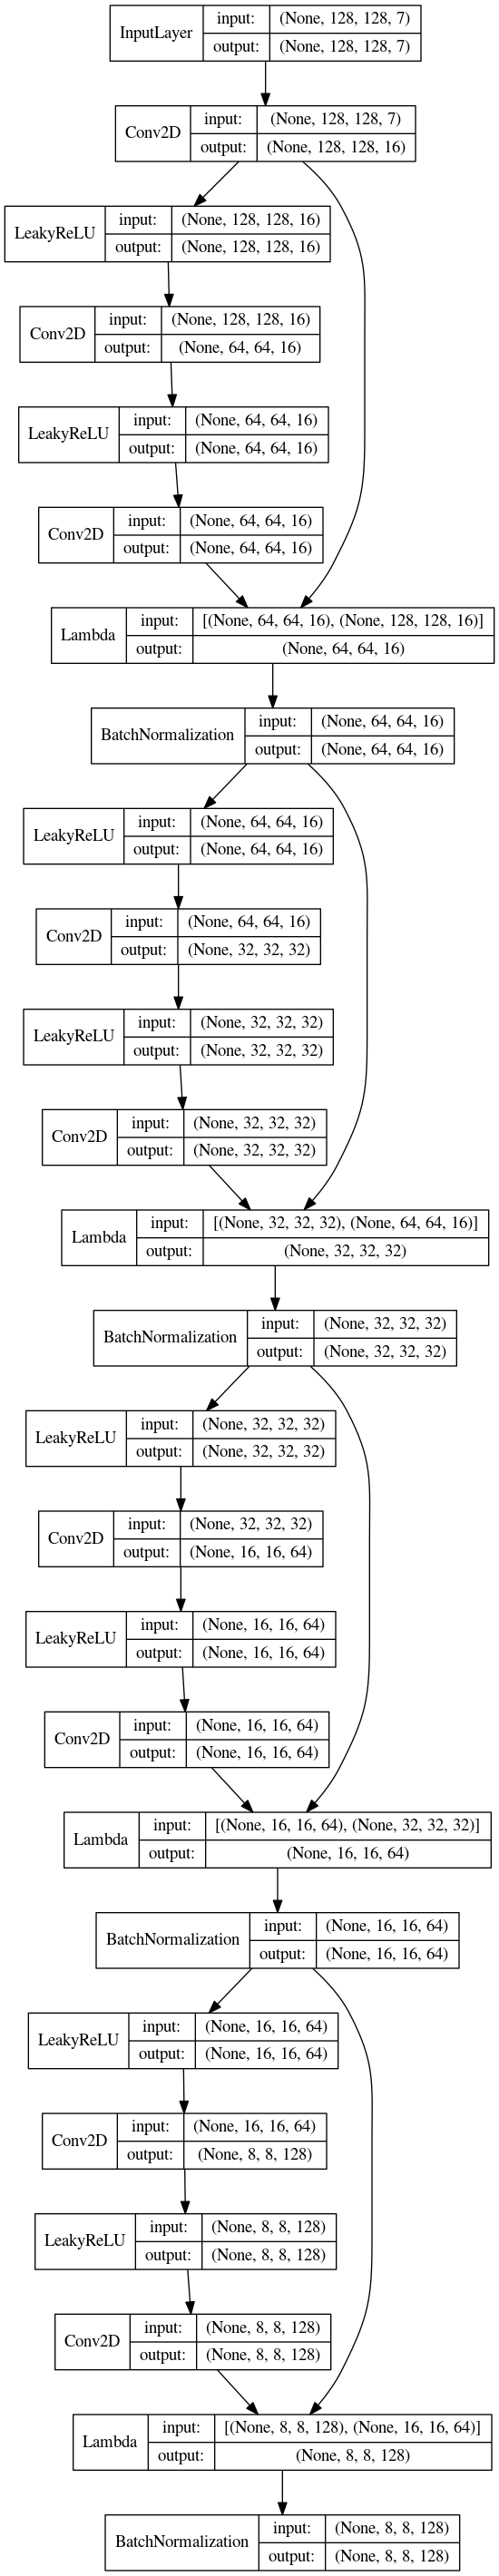

In [10]:
tf.keras.utils.plot_model(
    encoder,
    to_file='encoder.png',
    show_shapes=True,
    show_layer_names=False,
    rankdir='TB'
)
from IPython.display import Image
Image(filename='encoder.png')

In [8]:
decoder = load_model(model_dir + "decoder")

/home/rlourenco/miniconda3/envs/clouds-analysis-cpu/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py:791: UserWarning: models is not loaded, but a Lambda layer uses it. It may cause errors.
  , UserWarning)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
decoder_input (InputLayer)      (None, 8, 8, 128)    0                                            
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 8, 8, 128)    0           decoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_transpose (Conv2DTranspo (None, 16, 16, 128)  147584      leaky_re_lu_8[0][0]              
__________________________________________________________________________________________________
leaky_re_lu_9 (LeakyReLU)       (None, 16, 16, 128)  0           conv2d_transpose[0][0]           
__________________________________________________________________________________________________
conv2d_9 (

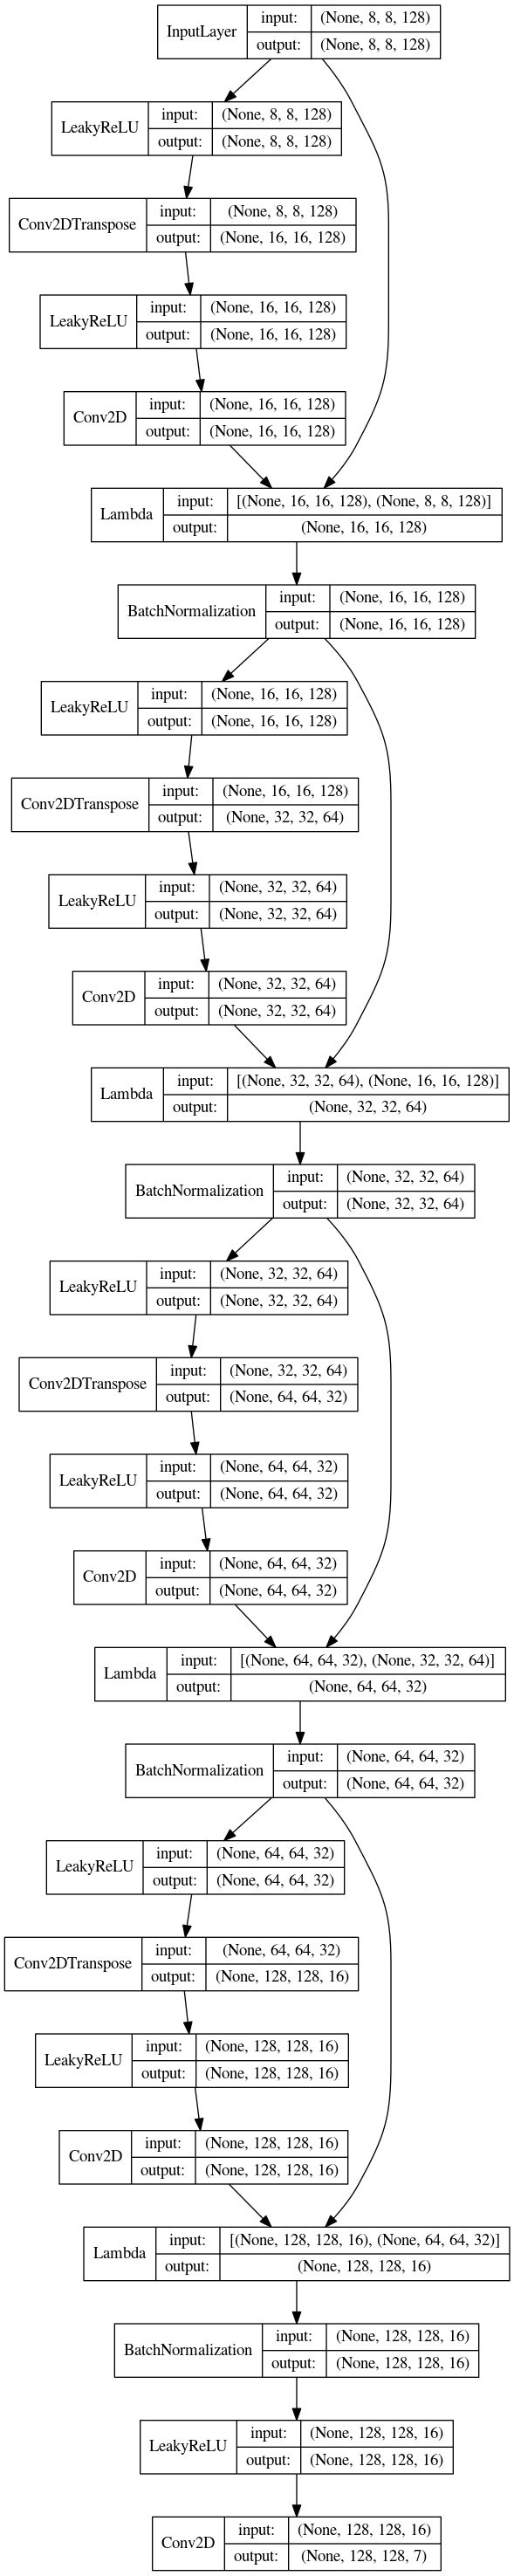

In [9]:
tf.keras.utils.plot_model(
    decoder,
    to_file='decoder.png',
    show_shapes=True,
    show_layer_names=False,
    rankdir='TB'
)
from IPython.display import Image
Image(filename='decoder.png')